# Titanic: Machine Learning from Disaster
<https://www.kaggle.com/c/titanic/>

## Data preparation

In [1]:
# import libraries
import pandas as pd 

In [2]:
# read the training and testing data
df_train = pd.read_csv('train.csv', index_col='PassengerId')
df_test = pd.read_csv('test.csv', index_col='PassengerId')

In [3]:
# training datasest overview
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [4]:
# testing datasest overview
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 892 to 1309
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Name      418 non-null    object 
 2   Sex       418 non-null    object 
 3   Age       332 non-null    float64
 4   SibSp     418 non-null    int64  
 5   Parch     418 non-null    int64  
 6   Ticket    418 non-null    object 
 7   Fare      417 non-null    float64
 8   Cabin     91 non-null     object 
 9   Embarked  418 non-null    object 
dtypes: float64(2), int64(3), object(5)
memory usage: 35.9+ KB


In [5]:
# pick out the columns that contain missing values, in the training data
df_train.isnull().sum(axis=0).loc[lambda x: x > 0]

Age         177
Cabin       687
Embarked      2
dtype: int64

In [6]:
# pick out the columns that contain missing values, in the testing data
df_test.isnull().sum(axis=0).loc[lambda x: x > 0]

Age       86
Fare       1
Cabin    327
dtype: int64

### Missing values handling

In [7]:
# replace missing values in 'Age' with the mean of 'Age' from the training data
df_train['Age'].fillna(df_train['Age'].mean(),inplace = True)
df_test['Age'].fillna(df_train['Age'].mean(),inplace = True)

In [8]:
# see if 'Embarked' from the training data has multiple modes
df_train['Embarked'].mode()

0    S
dtype: object

In [9]:
# replace missing values in 'Embarked' with the mode of 'Embarked' from the training data
df_train['Embarked'].fillna(df_train['Embarked'].mode()[0],inplace = True)
df_train['Embarked'].value_counts()

S    646
C    168
Q     77
Name: Embarked, dtype: int64

In [10]:
# replace missing values in 'Fare' with the mean of 'Fare' from the training data
df_test['Fare'].fillna(df_train['Fare'].mean(),inplace = True)

In [11]:
# drop 'Cabin' because both the training and testing data have too many missing values, and they are hard to infer
df_train = df_train.drop(columns='Cabin')
df_test = df_test.drop(columns='Cabin')

In [12]:
# check if there're still missing values in the training set
df_train.isnull().sum(axis=0).loc[lambda x: x > 0]

Series([], dtype: int64)

In [13]:
# check if there're still missing values in the testing set
df_test.isnull().sum(axis=0).loc[lambda x: x > 0]

Series([], dtype: int64)

### Feature engineering

In [14]:
# drop 'Name' and 'Ticket' because they are intuitively useless
df_train.drop(columns=['Name','Ticket'],inplace=True)
df_test.drop(columns=['Name','Ticket'],inplace=True)

In [15]:
# import the library for plotting
import matplotlib.pyplot as plt

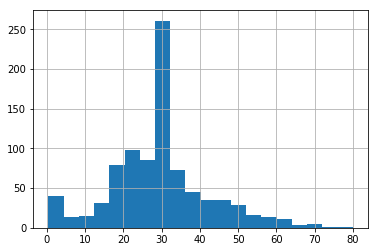

In [16]:
# plot a histogram of 'Age'
df_train['Age'].hist(bins=20)

In [17]:
# divide 'Age' into underage, elderly, and other adults
def age_group(age):
    if age < 18:
        return 1
    elif age > 60:
        return 3
    else:
        return 2

df_train['Age_Group'] = df_train['Age'].apply(age_group)
df_test['Age_Group'] = df_test['Age'].apply(age_group)

In [18]:
# drop 'Age' which is not needed now
df_train.drop(columns=['Age'],inplace=True)
df_test.drop(columns=['Age'],inplace=True)

In [19]:
# one-hot encoding for categorical features
df_train = pd.get_dummies(df_train, columns=['Sex', 'Embarked'],drop_first = True)
df_test = pd.get_dummies(df_test, columns=['Sex', 'Embarked'],drop_first = True)

In [20]:
# inspect the cleaned training data before saving
df_train.head()

,Survived,Pclass,SibSp,Parch,Fare,Age_Group,Sex_male,Embarked_Q,Embarked_S
PassengerId,,,,,,,,,
1,0,3,1,0,7.2500,2,1,0,1
2,1,1,1,0,71.2833,2,0,0,0
3,1,3,0,0,7.9250,2,0,0,1
4,1,1,1,0,53.1000,2,0,0,1
5,0,3,0,0,8.0500,2,1,0,1


In [21]:
# inspect the cleaned testing data before saving
df_test.head()

,Pclass,SibSp,Parch,Fare,Age_Group,Sex_male,Embarked_Q,Embarked_S
PassengerId,,,,,,,,
892,3,0,0,7.8292,2,1,1,0
893,3,1,0,7.0000,2,0,0,1
894,2,0,0,9.6875,3,1,1,0
895,3,0,0,8.6625,2,1,0,1
896,3,1,1,12.2875,2,0,0,1


In [22]:
# save the cleaned datasets
df_train.to_csv('train_clean.csv')
df_test.to_csv('test_clean.csv')

## Modeling

In [23]:
# read the cleaned training set
df = pd.read_csv('train_clean.csv', index_col='PassengerId')

In [24]:
# define the features and label
X = df.drop(columns='Survived')
y = df['Survived']

In [25]:
# import the libraries for modelling
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, cross_validate

In [26]:
# model fitting and hyperparameter tuning
# cross-validated grid-search over the lists of parameters
param_grid = {
    'min_samples_split': range(2,64,2),
    'max_depth': range(8,32),
    'criterion': ('gini', 'entropy')
}

clf = GridSearchCV(DecisionTreeClassifier(), param_grid, scoring='accuracy', cv=10)
clf.fit(X,y)

clf.best_params_

{'criterion': 'gini', 'max_depth': 18, 'min_samples_split': 14}

In [27]:
clf.best_score_

0.8283520599250936

In [28]:
# save the best model
clf_best = clf.best_estimator_

In [29]:
# evaluate the model with cross validation
scores = cross_validate(clf_best, X, y, cv=10, scoring=['accuracy','precision', 'recall', 'f1'])

score_dict = {'accuracy': scores['test_accuracy'].mean(),
              'precision': scores['test_precision'].mean(),
              'recall': scores['test_recall'].mean(),
              'f1': scores['test_f1'].mean()}

score_dict

{'accuracy': 0.8261048689138576,
 'precision': 0.8011945023082795,
 'recall': 0.7369747899159664,
 'f1': 0.7622954620750129}

## Predicting

In [30]:
# read the cleaned testing data
X_test = pd.read_csv('test_clean.csv', index_col='PassengerId')

In [31]:
# predict the labels
y_test = clf_best.predict(X_test)

In [32]:
# generate the output dataframe
out = pd.DataFrame({'Survived': y_test}, index=X_test.index)
out.head()

,Survived
PassengerId,
892,0
893,1
894,0
895,0
896,1


In [33]:
# save the predictions for submission
out.to_csv('new_submission.csv')